# DATA MINING PROJECT 



# Objective 

our objectve is to predict the median house prices in the state of californa

* This is a superised learning task because we are given labels

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline 


In [2]:
df=pd.read_csv('housing.csv')

In [3]:
display(df)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [4]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# EDA

In [5]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#finding null values 
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

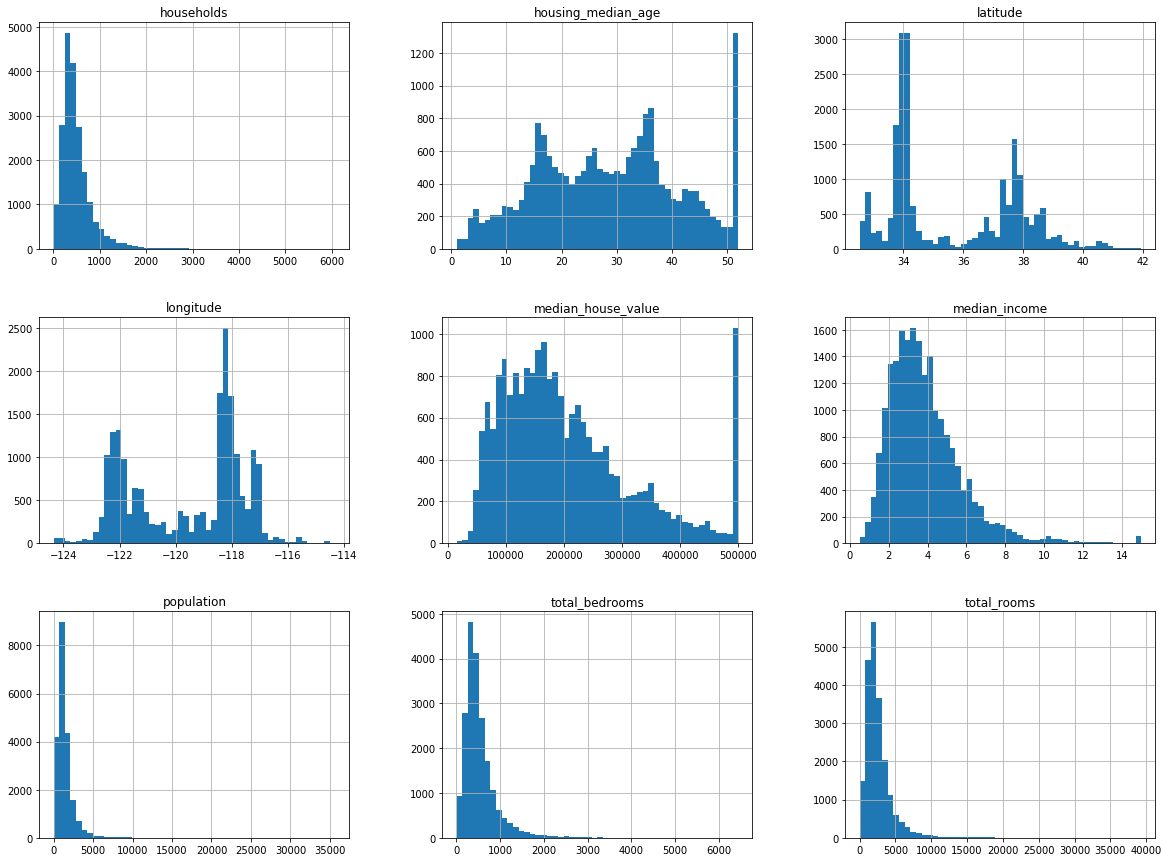

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Observations:

* 
##### Total bedroom: 
this graph is very similar to the previous one. it is clear that very few houses have bedrooms greater than 500 in each specified district. very few have more than 1k. 

* 
##### Population:
according to this bar graph the highest population amount is at about 800

* 
##### Households:
the pattern is very similar to the population graph; both are skewed and with a long tail on left. It is safe to say both have an inverse relationship in terms of their x and y values. 

* 
##### Median income: 
it is obvious that the most income around 2 to 6k within a district with a trailing decreasing tail to left. 

* 
##### Median house value:
here we see that majority of the districts sampled have a median house value between 100k and 250k. Also, the outlier is visible here where everything greater than 500k is recorded as one value.




[]

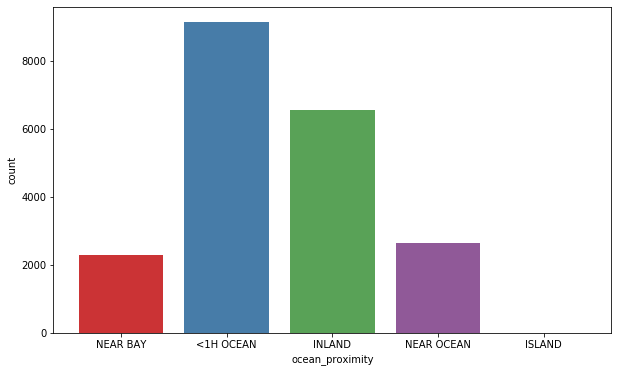

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='ocean_proximity', palette="Set1")
plt.plot()

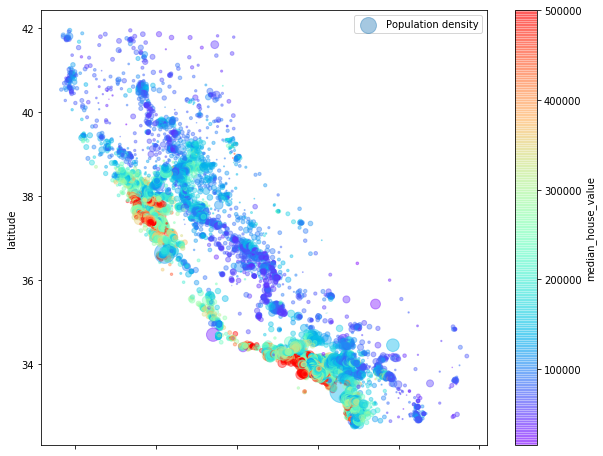

In [10]:

df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
         s=df["population"]/70,label="Population density",
         c="median_house_value",cmap=plt.get_cmap("rainbow"),
         colorbar=True,figsize=(10,8))
plt.legend()

###### As we can see the above plot resmbles the map of california 

<img src="map.jpg" style="width:400px;height:400px"/>

* From the plotted map above,  we can see that most houses that are located closer to the ocean tend to be higher in price. From the same plot we can also see some of these high priced houses located next to the ocean tend to have high population density, which also positively affects the price of the house.

* We also notice that most houses are < 20k range , and they are located further away from the beach.

# Correlation Analysis 

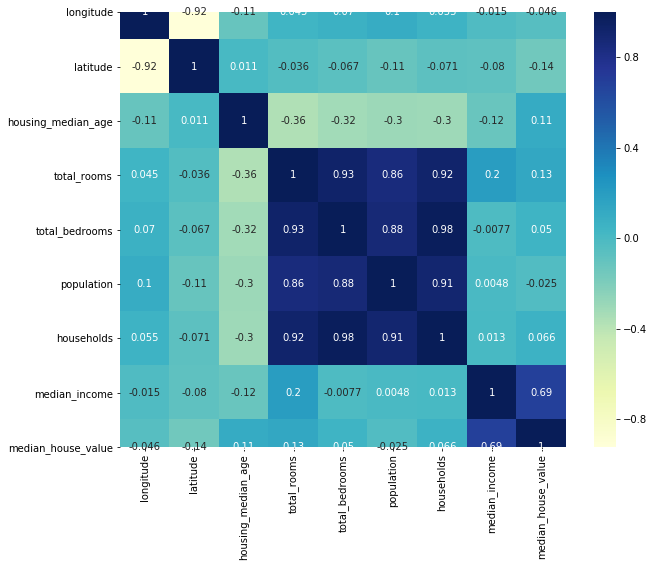

In [11]:
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

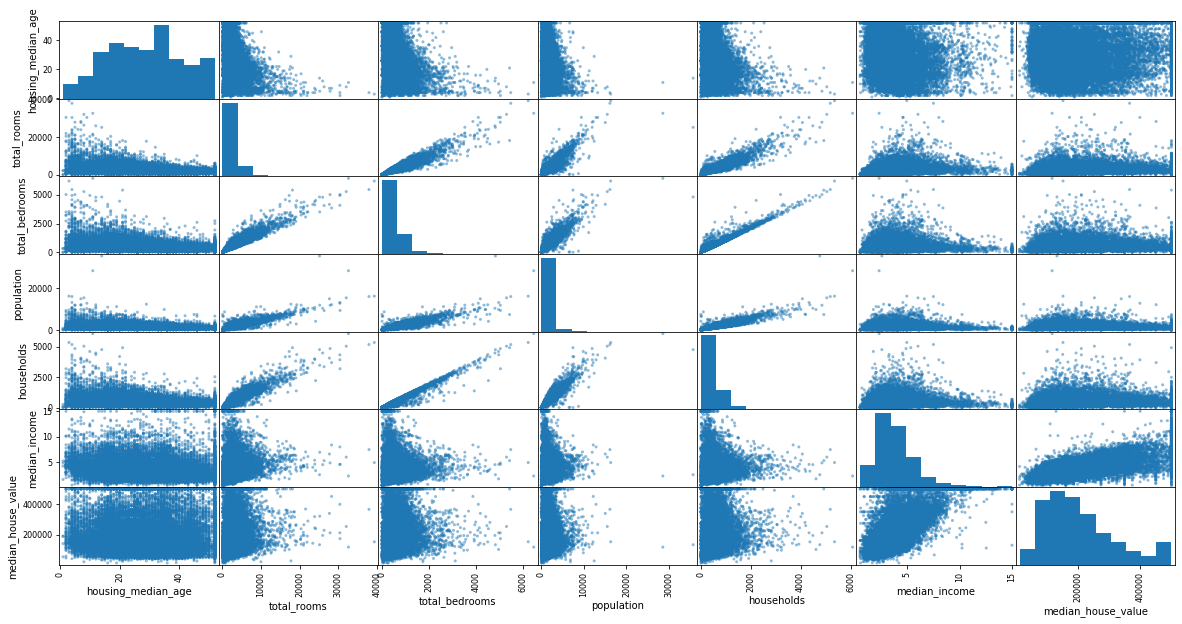

In [12]:

features = ["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]
scatter_matrix(df[features], figsize=(20,10))
plt.show()

In [13]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [14]:
corr_matrix["population"].sort_values(ascending=False)

population            1.000000
households            0.907222
total_bedrooms        0.877747
total_rooms           0.857126
longitude             0.099773
median_income         0.004834
median_house_value   -0.024650
latitude             -0.108785
housing_median_age   -0.296244
Name: population, dtype: float64


                                                        SCATTER PLOT 
* According to the scatter plots above there is a high correlation between median house value and median income in each of the districts.

* POPULATION VS. HOUSEHOLDS: According to the data seems like about half  of the sample tested have households of less than 2K per block with a population of of less than 20K

* HOUSEHOLDS VS TTL_BEDROOM: According to the data it seems like very few of the sample have households above 3K while having total bedrooms of 2.5K per block and more. 

* HOUSEHOLDS VS TTL_ROOMS: The data here tells us that not many homes(per block) sampled have total bedrooms of more than 20k and a household size greater than 4K.

* POPULATION VS TTL_BEDROOM: Very few of the tested Sample have total bedrooms of 2K per block while the population per block is below 20K. 

* POPULATION VS TTL_ROOMS: It is safe to say more than half of the sample tested has about 20K total rooms per block while maintaining population size of 10K per block.

* TTL_BEDROOM VS TTL_ROOMS: According to the data, it seems like as the  amount of total bedrooms per block increases the amount of total rooms per block is decreasing. The plot is telling us that the majority of the sampled data lies where the total bedroom is below roughly 3K and total rooms are below 20K. 


Text(0, 0.5, 'Median house value')

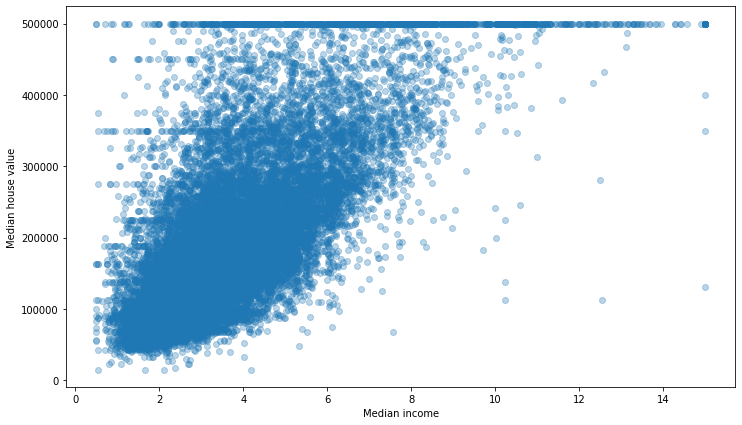

In [15]:
plt.figure(figsize=(12,7))
plt.scatter('median_income','median_house_value',data=df,alpha=0.3)
plt.xlabel('Median income')
plt.ylabel('Median house value')

# Pre-Processing 

In [16]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [17]:
#finding null values 
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

###### As we can see above the "total_bedrooms" have 207 missing values ,hence we need to replace them.


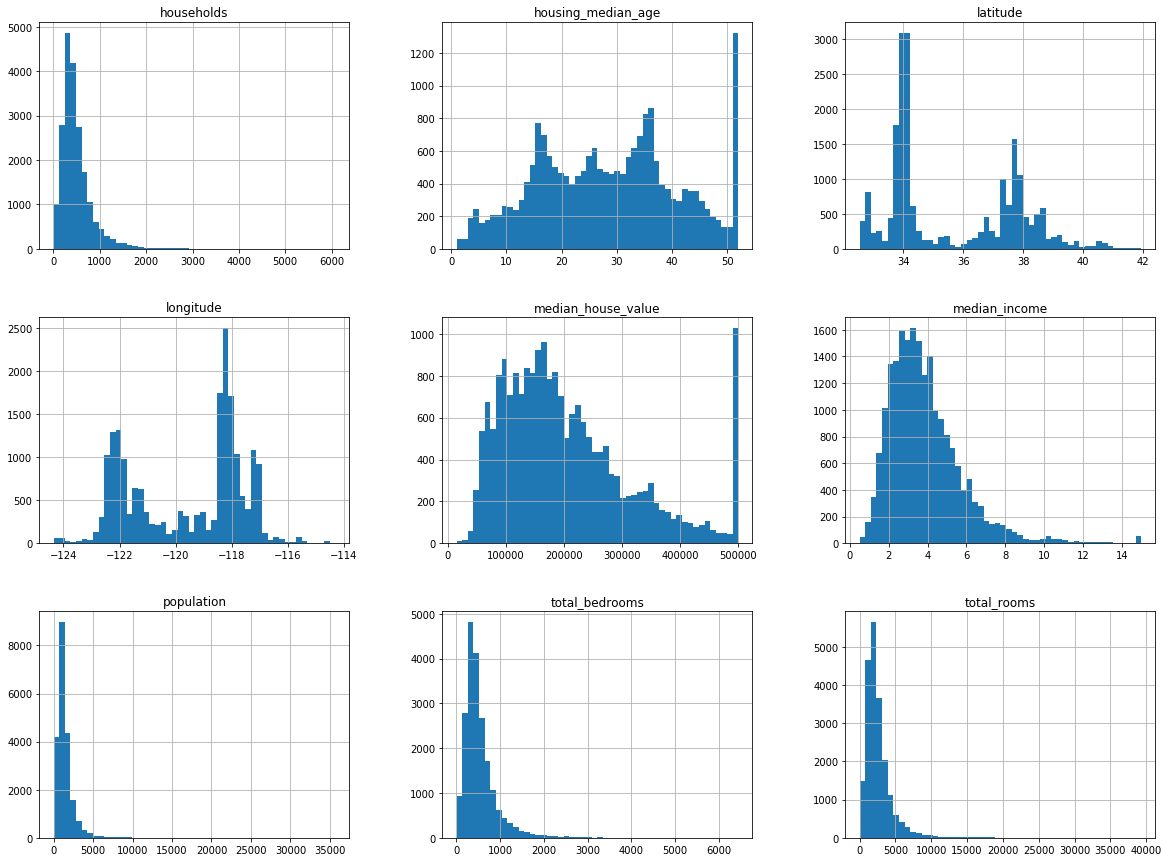

In [18]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Text(0, 0.5, 'frequency')

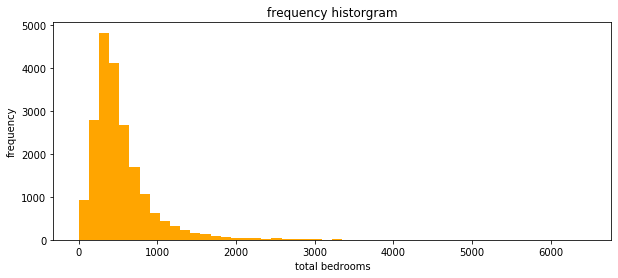

In [19]:
plt.figure(figsize=(10,4))
plt.hist(df[df['total_bedrooms'].notnull()]['total_bedrooms'],bins=50,color='orange')

(df['total_bedrooms']>4000).sum()
plt.title('frequency historgram')
plt.xlabel('total bedrooms')
plt.ylabel('frequency')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

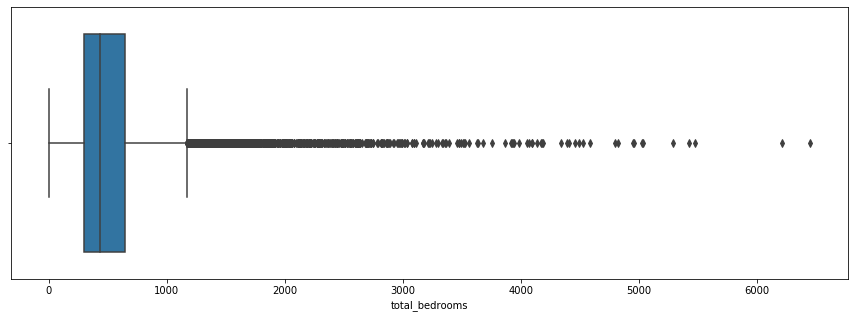

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(y="total_bedrooms",data=df, orient="h")
plt.plot

#### The above plots shows that "total bedrooms" has couple outliers. So in order to replace the null values we have to pick the median because it wont affect the accuracy of our model compared to using the mean.

In [21]:
df['total_bedrooms'] = df['total_bedrooms'].fillna((df['total_bedrooms'].median()))

In [22]:
#Checking to see how  many null values remain after the median replacemnet 
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [23]:
# Checking to see if the null value has been replaced 
df.iloc[[290]]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0           435.0   

     population  households  median_income  median_house_value ocean_proximity  
290       570.0       218.0          4.375            161900.0        NEAR BAY

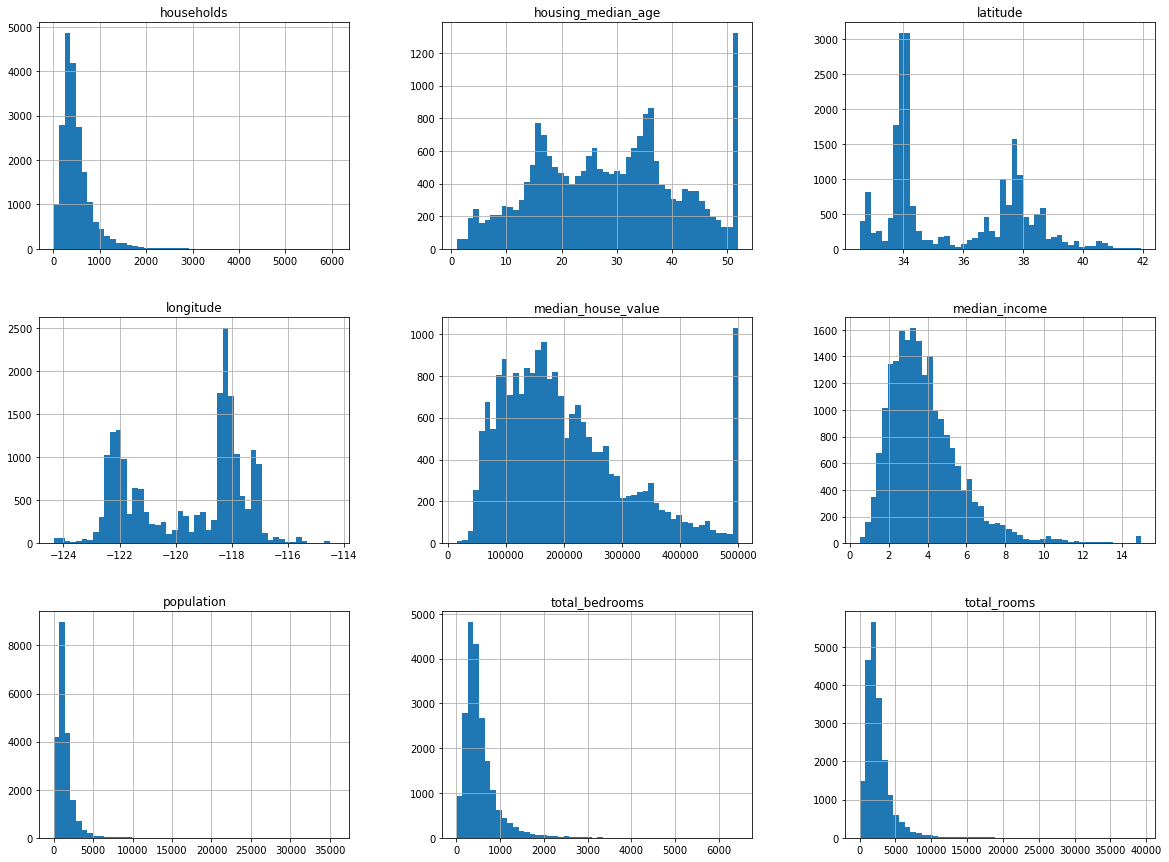

In [24]:
df.hist(bins=50, figsize=(20,15))
plt.show()

##### We also notice that the median_house_value graph has an outlier. In the graph we notice that there is a spike/increase for values greater that 500000. Since median house value is our target variable we need to make sure the data is clean .

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


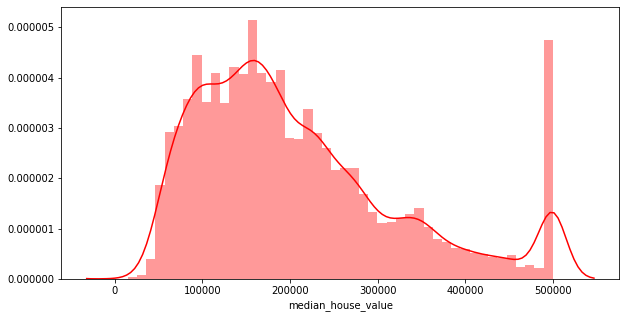

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(df['median_house_value'],color='r')
plt.show()


To ensure that the outlier sits greater than 500000 

In [26]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()

500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
Name: median_house_value, dtype: int64

##### After  performing some data analysis we find out that the median house value does not exceed over 500,001 because house values that exceed 500k are capped. Since this is our target variable  we concluded that the best thing to do was drop the values because it would poorly predict the values that are above 500k. Now that the outlier has been taken care of, our algorithms will only predict the price range for houses under 500k.

In [27]:
df = df.loc[df["median_house_value"]<500001,:]

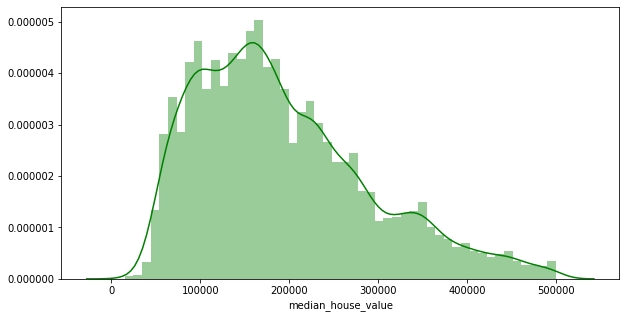

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(df['median_house_value'],color='g')
plt.show()


#### And since our outlier does not change the results, but it affects our assumptions, we dropped it. 

In [29]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()

500000.0    27
475000.0     8
483300.0     6
466700.0     4
470000.0     3
Name: median_house_value, dtype: int64

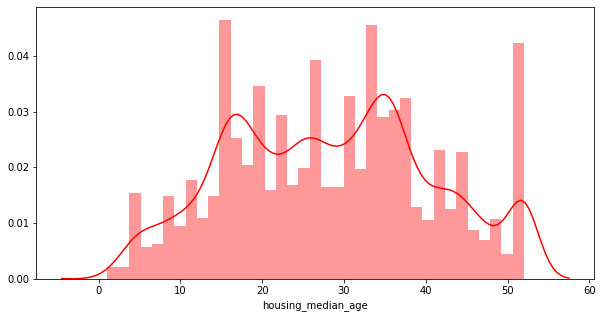

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(df['housing_median_age'],color='r')
plt.show()


In [31]:
df[df['housing_median_age']>45]['housing_median_age'].value_counts().head()

52.0    1103
46.0     236
47.0     190
48.0     167
49.0     126
Name: housing_median_age, dtype: int64

In [32]:
df = df.loc[df["housing_median_age"]<52,:]

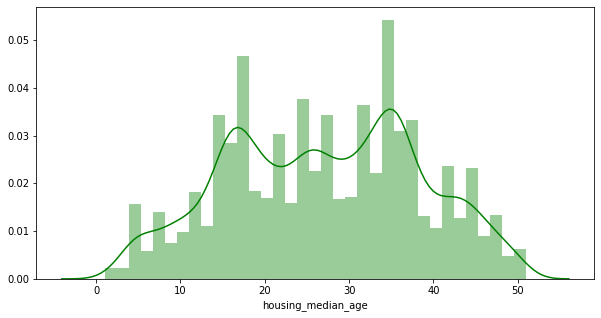

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df['housing_median_age'],color='g')
plt.show()

In [34]:
df[df['housing_median_age']>45]['housing_median_age'].value_counts().head()

46.0    236
47.0    190
48.0    167
49.0    126
50.0    123
Name: housing_median_age, dtype: int64

## Changing categorical value

In [35]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
8     -122.26     37.84                42.0       2555.0           665.0   
15    -122.26     37.85                50.0       1120.0           283.0   
18    -122.26     37.84                50.0       2239.0           455.0   

    population  households  median_income  median_house_value ocean_proximity  
0        322.0       126.0         8.3252            452600.0        NEAR BAY  
1       2401.0      1138.0         8.3014            358500.0        NEAR BAY  
8       1206.0       595.0         2.0804            226700.0        NEAR BAY  
15       697.0       264.0         2.1250            140000.0        NEAR BAY  
18       990.0       419.0         1.9911            158700.0        NEAR BAY

In [36]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [37]:
df["ocean_proximity"].replace({
    'NEAR BAY':0,
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'ISLAND': 4,
    
}, inplace=True)

In [38]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
8     -122.26     37.84                42.0       2555.0           665.0   
15    -122.26     37.85                50.0       1120.0           283.0   
18    -122.26     37.84                50.0       2239.0           455.0   

    population  households  median_income  median_house_value  ocean_proximity  
0        322.0       126.0         8.3252            452600.0                0  
1       2401.0      1138.0         8.3014            358500.0                0  
8       1206.0       595.0         2.0804            226700.0                0  
15       697.0       264.0         2.1250            140000.0                0  
18       990.0       419.0         1.9911            158700.0                0

In [39]:
display(df)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
8        -122.26     37.84                42.0       2555.0           665.0   
15       -122.26     37.85                50.0       1120.0           283.0   
18       -122.26     37.84                50.0       2239.0           455.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
8          1206.0       595.0         2.0804            226700.0   
15          697.0       264.0         2.1250            140000.0   
18          990.0       419.0         1.9911            158700.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
0                    0  
1                    0  
8                    0  
15                   0  
18                   0  
...                ...  
20635                2  
20636                2  
20637                2  
20638                2  
20639                2  

[18572 rows x 10 columns]

the total number of rooms in a block is not very helpful if we don’t know how many households there are. Hence we have to add more features 

In [40]:
df['rooms_in_household'] = df['total_rooms'] / df['households']
df['bedrooms_by_room'] = df['total_bedrooms'] / df['total_rooms']


In [41]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
8     -122.26     37.84                42.0       2555.0           665.0   
15    -122.26     37.85                50.0       1120.0           283.0   
18    -122.26     37.84                50.0       2239.0           455.0   

    population  households  median_income  median_house_value  \
0        322.0       126.0         8.3252            452600.0   
1       2401.0      1138.0         8.3014            358500.0   
8       1206.0       595.0         2.0804            226700.0   
15       697.0       264.0         2.1250            140000.0   
18       990.0       419.0         1.9911            158700.0   

    ocean_proximity  rooms_in_household  bedrooms_by_room  
0                 0            6.984127          0.146591  
1                 0            6.238137          0.155797  
8                 0            4.294118          0.260274  
15                0            4.242424          0.252679  
18                0            5.343675          0.203216

The rooms_per_household catogory is much more useful, now that we understand how many rooms exist in a single household

# Train and test 


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import KFold

In [44]:
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity','rooms_in_household','bedrooms_by_room']]
y = df['median_house_value']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# Scale Dataset 

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Models

### Linear Regression

In [47]:
model = LinearRegression()
model.fit(X_train, y_train) #training model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

In [49]:
coeff_df

Coefficient
longitude          -72722.047902
latitude           -78135.845966
housing_median_age   8983.183984
total_rooms         -4932.877243
total_bedrooms       4985.652522
population         -35534.021996
households          39329.785287
median_income       64281.705097
ocean_proximity      -424.185199
rooms_in_household   5855.421305
bedrooms_by_room    13391.142255

In [50]:
predictions = model.predict(X_test)

In [51]:
predictions

array([132560.89298756, 254705.09547028, 250625.15449526, ...,
       240912.23495879, 305206.30174146, 231284.14467922])

In [52]:
y_test

12869    133000.0
8961     332800.0
20309    194400.0
17392    117600.0
6961     198600.0
           ...   
6255     155800.0
3759     174200.0
859      247600.0
18315    406300.0
16804    327600.0
Name: median_house_value, Length: 3715, dtype: float64

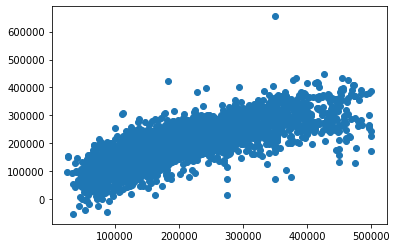

In [53]:
plt.scatter(y_test,predictions)

In [54]:
print('r^2:',r2_score(y_test,predictions))
print('MSE: ', mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,predictions)))

r^2: 0.626230668082892
MSE:  3561122024.2185645
RMSE:  59675.13740427051


### Decision Tree Regression

In [55]:
model_reg=DecisionTreeRegressor(max_depth=9)
model_reg.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [56]:
reg_prediction = model_reg.predict(X_test)

In [57]:
reg_prediction

array([153905.31400966, 386871.66666667, 303699.04761905, ...,
       258607.69230769, 303932.89473684, 279435.11904762])

In [58]:
y_test

12869    133000.0
8961     332800.0
20309    194400.0
17392    117600.0
6961     198600.0
           ...   
6255     155800.0
3759     174200.0
859      247600.0
18315    406300.0
16804    327600.0
Name: median_house_value, Length: 3715, dtype: float64

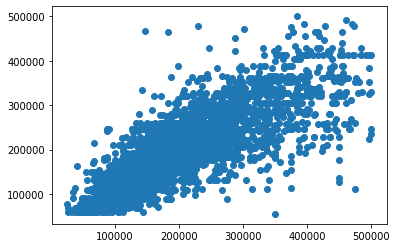

In [59]:
plt.scatter(y_test,reg_prediction)

In [60]:
print('r^2:',r2_score(y_test,reg_prediction))
print('MSE: ', mean_squared_error(y_test,reg_prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test,reg_prediction)))

r^2: 0.6962922152477853
MSE:  2893604126.5354524
RMSE: 53792.231098323595


### Random Forest Tree Regressor


In [61]:
model_Forestreg= RandomForestRegressor(30)
model_Forestreg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [62]:
Forestreg_prediction = model_Forestreg.predict(X_test)

In [63]:
Forestreg_prediction

array([127083.33333333, 343316.66666667, 265180.        , ...,
       229913.33333333, 364450.        , 290673.33333333])

In [64]:
y_test

12869    133000.0
8961     332800.0
20309    194400.0
17392    117600.0
6961     198600.0
           ...   
6255     155800.0
3759     174200.0
859      247600.0
18315    406300.0
16804    327600.0
Name: median_house_value, Length: 3715, dtype: float64

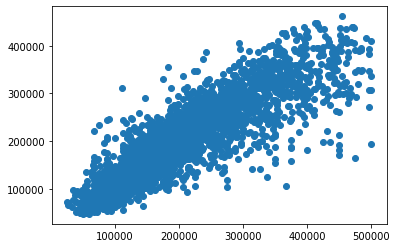

In [65]:
plt.scatter(y_test,Forestreg_prediction)

In [66]:
print('r^2:',r2_score(y_test,Forestreg_prediction))
print('MSE: ', mean_squared_error(y_test,Forestreg_prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test,Forestreg_prediction)))

r^2: 0.7912676742389861
MSE:  1988716620.0108654
RMSE: 44595.02909530238


### KNN

In [67]:
model_KNN= KNeighborsRegressor()
model_KNN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [68]:
KNN_prediction = model_KNN.predict(X_test)

In [69]:
KNN_prediction

array([130000., 288520., 259620., ..., 266140., 367980., 312660.])

In [70]:
y_test

12869    133000.0
8961     332800.0
20309    194400.0
17392    117600.0
6961     198600.0
           ...   
6255     155800.0
3759     174200.0
859      247600.0
18315    406300.0
16804    327600.0
Name: median_house_value, Length: 3715, dtype: float64

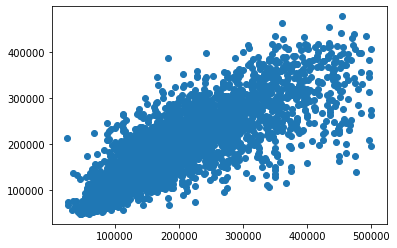

In [71]:
plt.scatter(y_test,KNN_prediction)

In [72]:
print('r^2:',r2_score(y_test,KNN_prediction))
print('MSE: ', mean_squared_error(y_test,KNN_prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test,KNN_prediction)))

r^2: 0.6739370270654486
MSE:  3106595258.213761
RMSE: 55736.83932744806
